In [15]:
import networkx as nx
import pylab as plt
G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])
Ln = nx.normalized_laplacian_matrix(G)
An=Ln.todense()
An.sum()

0.21230629976529625

In [16]:
 print(An)

[[ 1.         -0.57735027  0.          0.          0.        ]
 [-0.57735027  1.         -0.40824829 -0.40824829  0.        ]
 [ 0.         -0.40824829  1.          0.         -0.5       ]
 [ 0.         -0.40824829  0.          1.         -0.5       ]
 [ 0.          0.         -0.5        -0.5         1.        ]]


In [17]:
from scipy.linalg import expm, sinm, cosm
listexpAn = []
for t in range(10):
    expAn = expm(-t*An)
    listexpAn.append(expAn.sum())

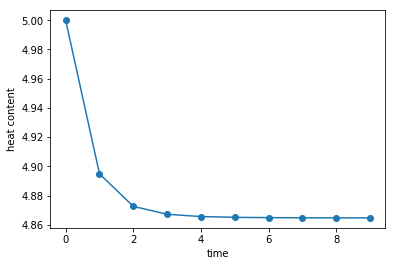

In [21]:
plt.plot(range(10),listexpAn,"o-")
plt.xlabel("time")
plt.ylabel("heat content")
plt.show()

In [19]:
#Mellin transform

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

def kplaplacian_mlf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -pow(k,-1*s)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [20]:
#given the Laplacian matrix L, compute the normalised version
def normalised_genlap(L):
    D = np.diagonal(L)                # extract the diagonal elements which correspond to the degree
    D = [pow(d,-0.5) for d in D]      # compute d^(-1/2) for each of the degrees
    D_hf = np.diag(D)                 # form a square matrix D^(-1/2)
    Df = np.matmul(D_hf, L)           # compute D^(-1/2) L
    Ln = np.matmul(Df,D_hf)           # compute D^(-1/2) L D^(-1/2)
    return Ln                         # return normalised Laplacian

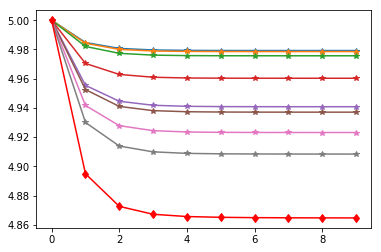

In [23]:
import networkx as nx
import pylab as plt
import itertools
from scipy.linalg import expm, sinm, cosm

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])

list_norm_genlap = []
lists = [1,1.02,1.1,1.5,2,2.1,2.5,3]

for s in lists:
    L = normalised_genlap(kplaplacian_mlf(G,s))        #compute the normalised generalised Laplacian with s=2
    A=L
    #A.sum()
    listexpA = []
    for t in range(10):
        expA = expm(-t*A)
        listexpA.append(expA.sum())
    plt.plot(range(10),listexpA,"*-")
    plt.hold 
plt.plot(range(10),listexpAn,"rd-")
plt.show()
    #list_norm_genlap.append(listexpA)

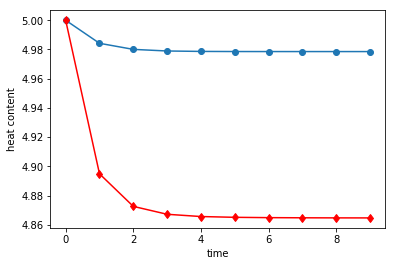

In [13]:
plt.plot(range(10),listexpA,"o-",range(10),listexpAn,"rd-")
plt.xlabel("time")
plt.ylabel("heat content")
plt.show()

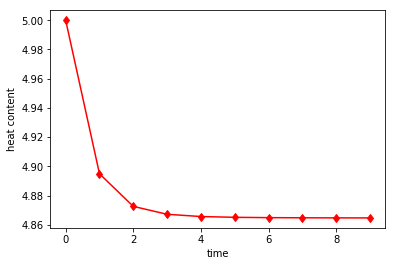

In [10]:
plt.plot(range(10),listexpAn,"rd-")
plt.xlabel("time")
plt.ylabel("heat content")
plt.show()